In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
df = pd.read_csv("dummy_boston.csv")
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print("X shape:", X_train.shape, "y shape:", y_train.shape)

X shape: (4, 13) y shape: (4,)


In [6]:

def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model


In [7]:
optimizers = {
    'Adam_0.01': Adam(learning_rate=0.01),
    'Adam_0.001': Adam(learning_rate=0.001),
    'SGD_0.01_momentum': SGD(learning_rate=0.01, momentum=0.9),
    'SGD_0.001_momentum': SGD(learning_rate=0.001, momentum=0.9),
}

In [8]:
results = {}


In [9]:
for label, optimizer in optimizers.items():
    print(f"\nTraining with: {label}")
    model = build_model()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=20, verbose=0)
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")
    results[label] = {
        'history': history.history,
        'test_loss': test_loss,
        'test_mae': test_mae,
        'model': model
    }


Training with: Adam_0.01


C:\Users\saray\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test MSE: 91.7167, Test MAE: 9.5769

Training with: Adam_0.001
Test MSE: 453.2540, Test MAE: 21.2898

Training with: SGD_0.01_momentum
Test MSE: 2.7903, Test MAE: 1.6704

Training with: SGD_0.001_momentum
Test MSE: 101.8891, Test MAE: 10.0940


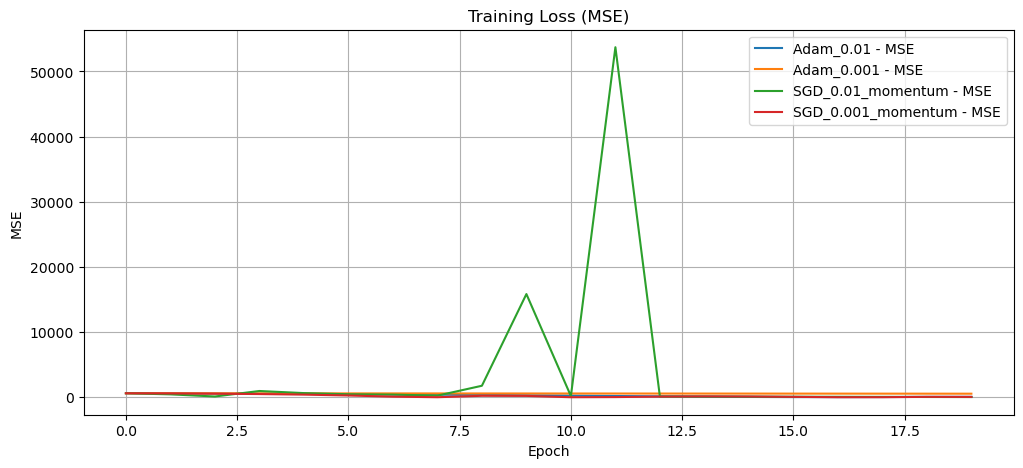

In [10]:
plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data['history']['loss'], label=f"{label} - MSE")
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

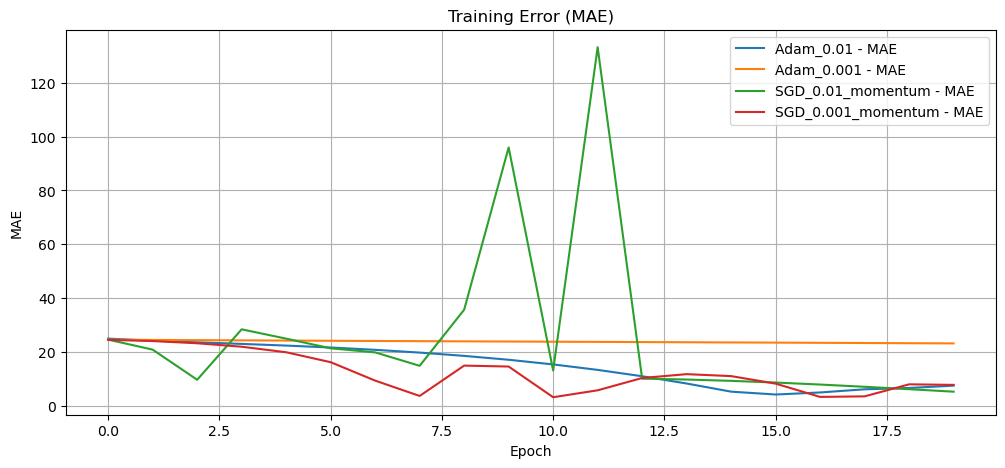

In [11]:
plt.figure(figsize=(12, 5))
for label, data in results.items():
    plt.plot(data['history']['mae'], label=f"{label} - MAE")
plt.title("Training Error (MAE)")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()